# Data Visualization

seaborn 에서는 크게 3가지 style 설정을 할 수 있다.

1. 전체적인 표 양식(grid, title, label)등-> style
2. 색 -> palette
3. 글자 -> context

자세한 과정은 [Seaborn Controlling figure aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html)를 참고하면 좋다.

기본적으로 seaborn에서 만든 plot은 `Axes`로 리턴해준다. 즉 이미 만들어진 plot에 옵션을 추가하고 싶을 경우, `ax.set_xxxx` 를 사용하면 적용할 수 있다.

In [60]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter('ignore')

In [61]:
spotify_data = pd.read_csv('spotify.csv', index_col='Date', parse_dates=True)
feature = pd.read_csv('feature_importances.csv')
feature = feature[['feature', 'average']][:15]

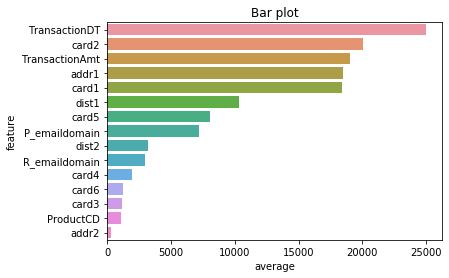

In [62]:
bars = sns.barplot(x='average', y='feature', data=feature.sort_values('average', ascending=False))
bars.set_title('Bar plot')

plt.show()

## 1. Style

* style은 5개 (__"darkgrid", "whitegrid", "dark", "white", "ticks"__)을 제공한다.

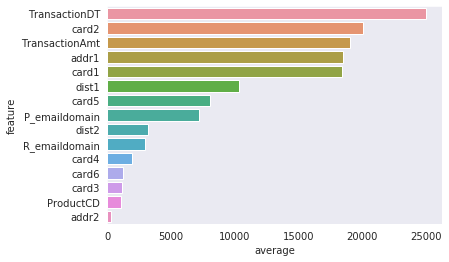

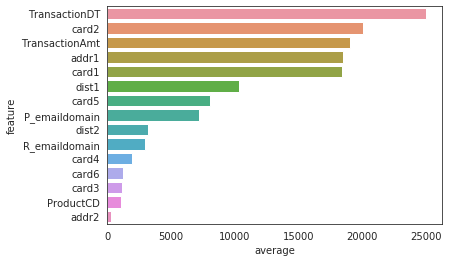

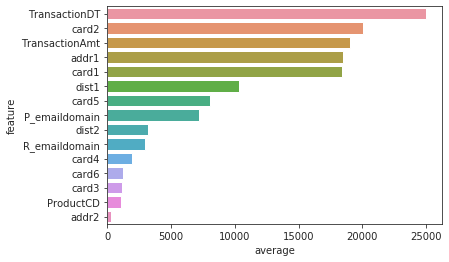

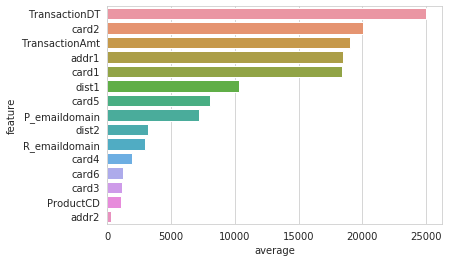

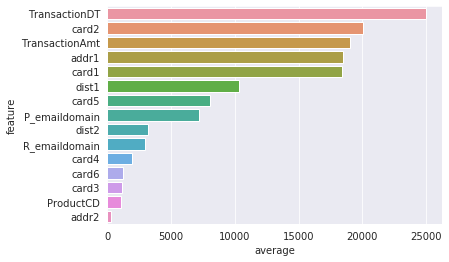

In [27]:
fig = plt.figure()
with sns.axes_style('dark'):
    sns.barplot(x='average', y='feature', data=feature.sort_values('average', ascending=False))
    
fig2 = plt.figure()
with sns.axes_style('white'):
    sns.barplot(x='average', y='feature', data=feature.sort_values('average', ascending=False))
    
fig3 = plt.figure()
with sns.axes_style('ticks'):
    sns.barplot(x='average', y='feature', data=feature.sort_values('average', ascending=False))
    
fig4 = plt.figure()
with sns.axes_style('whitegrid'):
    sns.barplot(x='average', y='feature', data=feature.sort_values('average', ascending=False))
    
fig5 = plt.figure()
with sns.axes_style('darkgrid'):
    sns.barplot(x='average', y='feature', data=feature.sort_values('average', ascending=False))
    
plt.show()

## 2. Color palette

* 연속되는 색상을 미리 저장해둔 형식 이름을 넣어 사용한다.
* [seaborn.color_palette](https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette)를 참고.

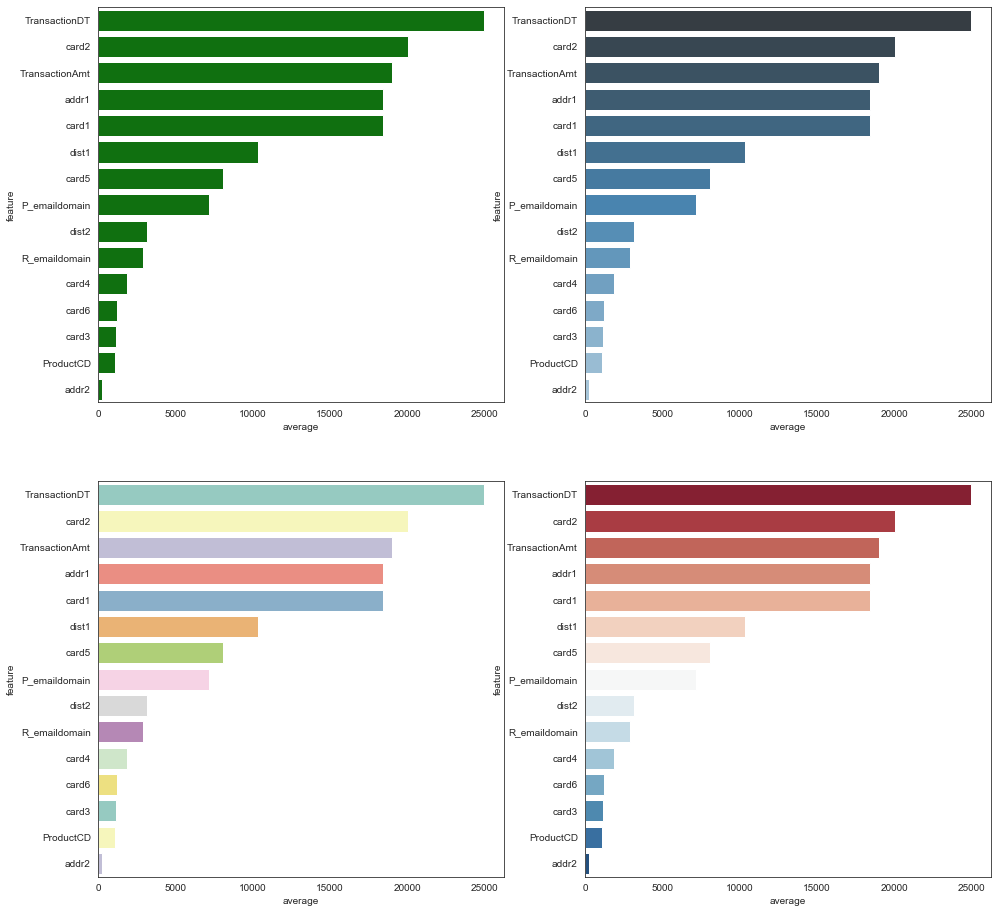

In [124]:
df = feature.sort_values('average', ascending=False)
fig, ax = plt.subplots(2,2, figsize=(16,16))

ax1 = sns.barplot(x='average', y='feature', data=df, color='green', ax=ax[0][0])
sns.barplot(x='average', y='feature', data=df, palette='Blues_d', ax=ax[0][1])
sns.barplot(x='average', y='feature', data=df, palette='Set3', ax=ax[1][0])
sns.barplot(x='average', y='feature', data=df, palette='RdBu', ax=ax[1][1])

## 3. set_context

* contents stlye은 4개(__"notebook"“paper”, “talk”,“poster"__)을 제공한다. 
* default는 "notebook"이다.

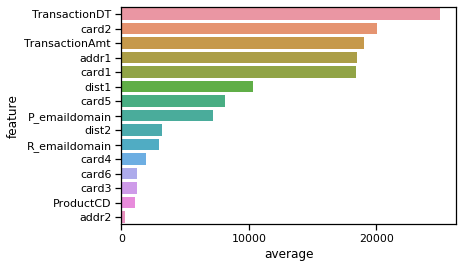

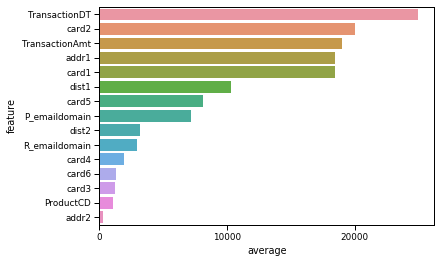

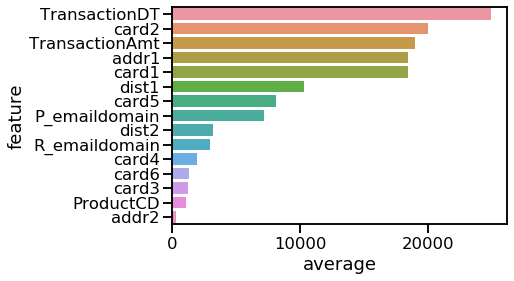

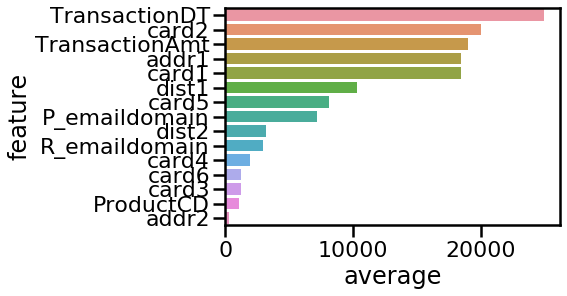

In [34]:
sns.set_context('notebook')
fig = plt.figure()
sns.barplot(x='average', y='feature', data=feature.sort_values('average', ascending=False))

sns.set_context('paper')    
fig2 = plt.figure()
sns.barplot(x='average', y='feature', data=feature.sort_values('average', ascending=False))
    
sns.set_context('talk')    
fig3 = plt.figure()
sns.barplot(x='average', y='feature', data=feature.sort_values('average', ascending=False))
    
sns.set_context('poster')    
fig4 = plt.figure()
sns.barplot(x='average', y='feature', data=feature.sort_values('average', ascending=False))


plt.show()

## 번외

### plt style을 적용하면 seaborn도 바뀔까?

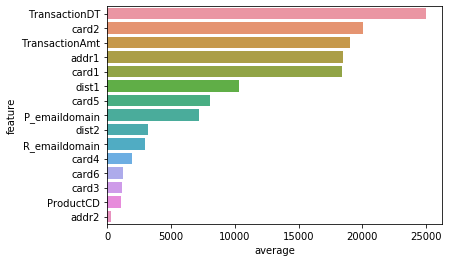

In [64]:
sns.barplot(x='average', y='feature', data=feature.sort_values('average', ascending=False))

In [66]:
plt.style.use('dark_background')

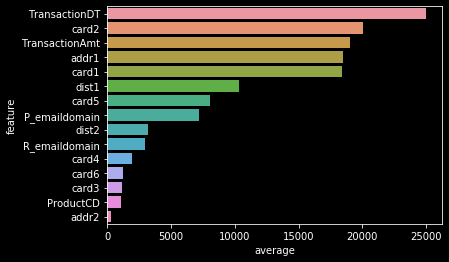

In [67]:
sns.barplot(x='average', y='feature', data=feature.sort_values('average', ascending=False))

### 특정 영역만 색깔 바꾸기

In [77]:
sns.set_style('white')

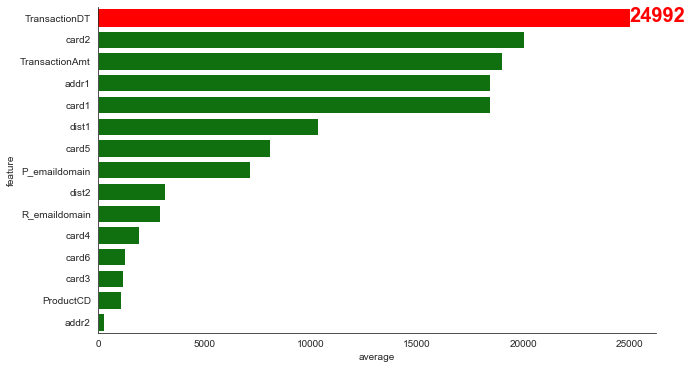

In [121]:
fig, ax = plt.subplots(figsize=(10,6))
ax1 = sns.barplot(x='average', y='feature', data=df, color='green', ax=ax)
ax1.patches[0].set_color('red')
ax1.text(ax1.patches[0].get_width(), (ax1.patches[0].get_y() + ax1.patches[0].get_height())/2, int(ax1.patches[0].get_width()),
        fontsize=20, color='red', fontweight='bold')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.show()

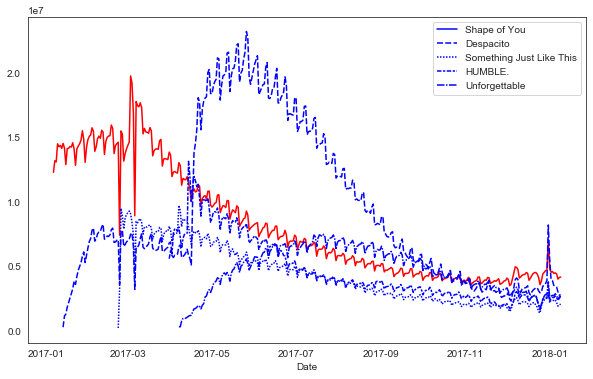

In [115]:
figure, ax = plt.subplots(figsize=(10,6))
lines = sns.lineplot(data=spotify_data, color='red', ax=ax)
for i in range(len(lines.get_lines())):
    if i == 0:
        lines.get_lines()[i].set_color('red')
    else:
        lines.get_lines()[i].set_color('blue')
lines.legend()